# BL40A2010 Introduction to IoT-Based Systems

## Assignment 4, 24.09.2020

### Author: Kristen Sirel

**(1) Draw a graph with star topology with five nodes (one in the center $A$, four in the edges $B$-$E$).
If the topology is directed as a many-to-one topology, write the structure of awareness of the system, considering that nodes $B$-$E$ acquire and process data about a supporting reality $T$, while $A$ can only receive data from it. Remember the notation $Xy$ means the image of $X$ by $Y$.**

In [31]:
!pip install -r requirements.txt
!pip install --upgrade networkx
!pip install --upgrade scipy

import networkx as nx
import matplotlib.pyplot as plt 
import scipy as sp
import numpy as np
import pandas as pd
import matplotlib.dates as mdates

Requirement already up-to-date: networkx in /srv/conda/envs/notebook/lib/python3.7/site-packages (2.5)
Requirement already up-to-date: scipy in /srv/conda/envs/notebook/lib/python3.7/site-packages (1.5.2)


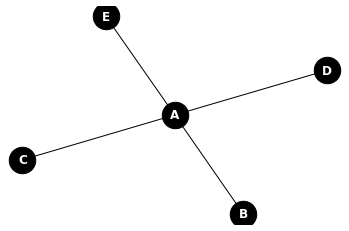

In [32]:
T = nx.Graph()
T.add_nodes_from([0,1,2,3,4])
for i in range(1,5):
    T.add_edge(0, i)
mapping = {0: "A",1: "B",2: "C",3: "D",4: "E"}
G = nx.relabel_nodes(T, mapping)
nx.draw_networkx(G, node_color='black', font_color='white', edge_color='black', font_weight='bold',  node_size=700)
plt.axis('off')
plt.show()

Node $A$ forms its image of reality from the images of reality of nodes $B-E$ so the structual avearnes of the system is  $(T_{B} + T_{C} + T_{D} + T_{E})A$.

**(2) Assume that graph illustrate a scenario of four sensor nodes that also (pre-)process data and one aggregator node as follows. Nodes $B$ and $C$ monitor temperature and wind speed at Airport station in Lappeenranta, respectively. Nodes $D$ and $E$ monitor temperature and wind speed at Lepola station in Lappeenranta, respectively. Nodes $B$ and $D$ send a binary message to $A$ indicating if during that period the temperature was more than $25$ degrees ("1" means above, "0" means below or equal to). Likewise nodes $C$ and $E$ send a binary message to $A$ indicating if during that period the wind speed was more than $5$ m/s ("1" means above, "0" means below or equal to). Download and plot the data from [FMI](http://en.ilmatieteenlaitos.fi/download-observations\#!/) with 1 hour resolution during July, 2018. Using this data, plot the binary signals sent from the nodes $B$-$E$ to the aggregator $A$.**

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 745 entries, 2018-07-01 00:00:00 to 2018-08-01 00:00:00
Data columns (total 1 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Air temperature (degC)  745 non-null    float64
dtypes: float64(1)
memory usage: 11.6 KB
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 745 entries, 2018-07-01 00:00:00 to 2018-08-01 00:00:00
Data columns (total 1 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Wind speed (m/s)  745 non-null    float64
dtypes: float64(1)
memory usage: 11.6 KB
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 745 entries, 2018-07-01 00:00:00 to 2018-08-01 00:00:00
Data columns (total 1 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Air temperature (degC)  745 non-null    float64
dtypes: float64(1)
memory usage: 11.

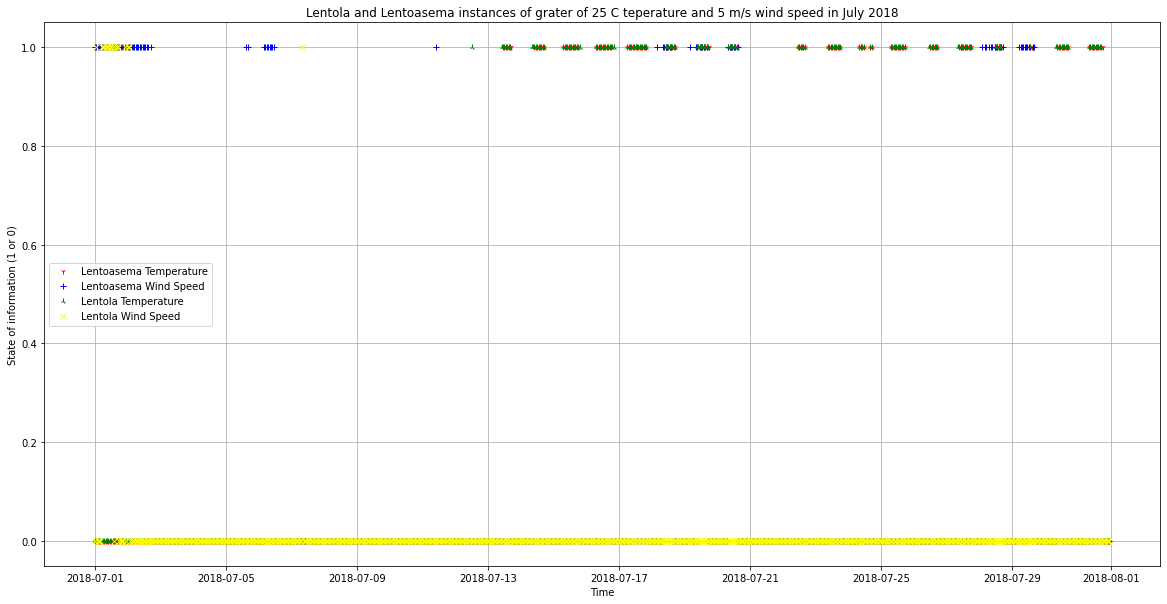

In [38]:
node_B = pd.read_csv("LPR_Lento_July_Temp.csv",dayfirst=True,sep=",",
                           header=0,decimal=b".",index_col=0, 
                           parse_dates= [[0, 1, 2, 3]],usecols=[0,1,2,3,5])
node_B.info()

node_C = pd.read_csv("LPR_Lento_July_Seed.csv",dayfirst=True,sep=",",
                           header=0,decimal=b".",index_col=0, 
                           parse_dates= [[0, 1, 2, 3]],usecols=[0,1,2,3,5])
node_C.info()

node_D = pd.read_csv("LPR_Lepola_July_Temp.csv",dayfirst=True,sep=",",
                           header=0,decimal=b".",index_col=0, 
                           parse_dates= [[0, 1, 2, 3]],usecols=[0,1,2,3,5])
node_D.info()

node_E = pd.read_csv("LPR_Lepola_July_Seed.csv",dayfirst=True,sep=",",
                           header=0,decimal=b".",index_col=0, 
                           parse_dates= [[0, 1, 2, 3]],usecols=[0,1,2,3,5])
node_E.info()

fig, ax = plt.subplots(figsize=(20,10))

plt.plot(node_B['2018-7']>25,label='Lentoasema Temperature',color='red', marker='1',linestyle='') 
 
plt.plot(node_C['2018-7']>5,label='Lentoasema Wind Speed',color='blue', marker='+',linestyle='')

plt.plot(node_D['2018-7']>25,label='Lentola Temperature',color='green', marker='2',linestyle='')

plt.plot(node_E['2018-7']>5,label='Lentola Wind Speed',color='yellow', marker='x',linestyle='')

plt.legend()
plt.grid(True)
plt.title("Lentola and Lentoasema instances of grater of 25 C teperature and 5 m/s wind speed in July 2018") 
plt.ylabel("State of information (1 or 0)") 
plt.xlabel("Time") 
plt.show()

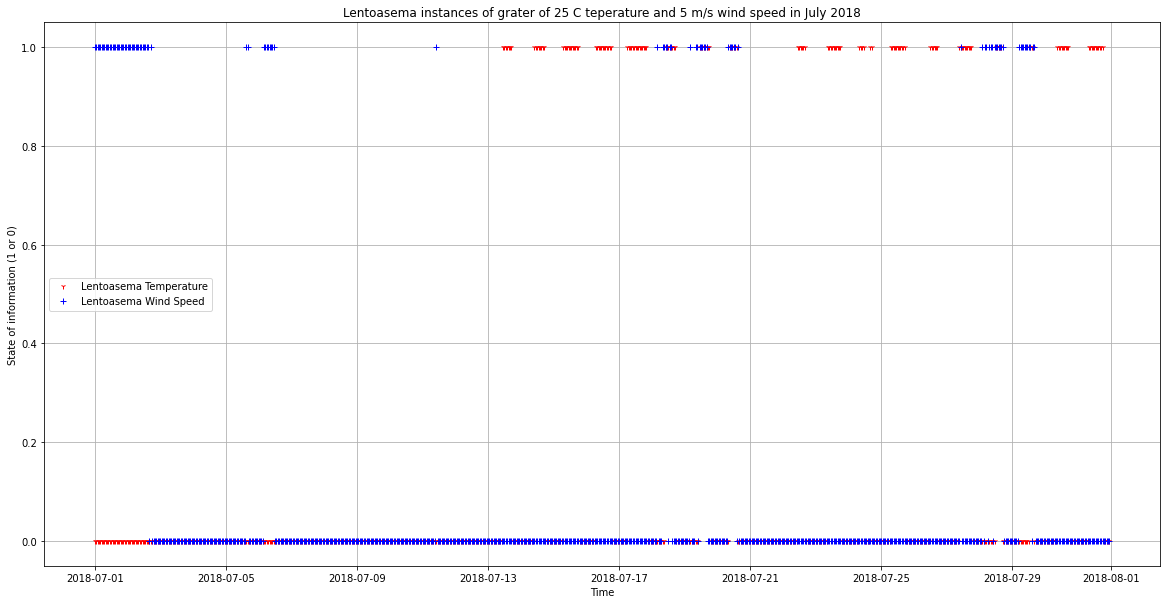

In [34]:
fig, ax = plt.subplots(figsize=(20,10))

plt.plot(node_B['2018-7']>25,label='Lentoasema Temperature',color='red', marker='1',linestyle='') 
 
plt.plot(node_C['2018-7']>5,label='Lentoasema Wind Speed',color='blue', marker='+',linestyle='')

plt.legend()
plt.grid(True)
plt.title("Lentoasema instances of grater of 25 C teperature and 5 m/s wind speed in July 2018") 
plt.ylabel("State of information (1 or 0)") 
plt.xlabel("Time") 
plt.show()

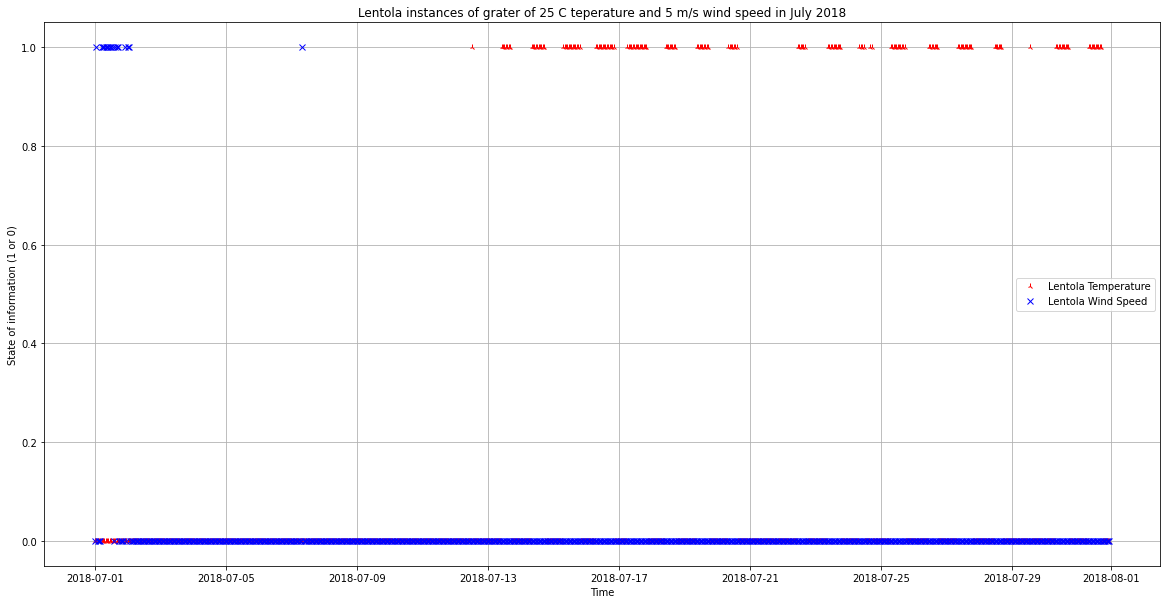

In [35]:
fig, ax = plt.subplots(figsize=(20,10))

plt.plot(node_D['2018-7']>25,label='Lentola Temperature',color='red', marker='2',linestyle='')

plt.plot(node_E['2018-7']>5,label='Lentola Wind Speed',color='blue', marker='x',linestyle='')

plt.legend()
plt.grid(True)
plt.title("Lentola instances of grater of 25 C teperature and 5 m/s wind speed in July 2018") 
plt.ylabel("State of information (1 or 0)") 
plt.xlabel("Time") 
plt.show()

**(3) Node $A$ needs to identify risky situations in Lappeenranta when the temperature is above $25$ degrees and the wind is above $5$ m/s based on the sensors' signals. If a risky situation is identified at node $A$ as binary number "1" while normal situations as "0". How would you solve this problem? Plot the output signal from node $A$ and discuss its relation to the input signals from $B$-$E$.**

In [ ]:
node_A = np.zeros([len(node_B),2])
for i in range(0,len(node_B)):
    if (node_B.values[i]>25 or node_D.values[i]>25):
        if (node_C.values[i]>5 or node_E.values[i]>5):
              node_A[i,:]=[1,node_B.dates]
    else:
        node_A[i,:]=[0,node_B.dates]

fig, ax = plt.subplots(figsize=(20,10))

plt.plot(node_A,label='Lentoasema Temperature',color='red', marker='1',linestyle='') 


plt.legend()
plt.grid(True)
plt.title("Lentola and Lentoasema instances of grater of 25 C teperature and 5 m/s wind speed in July 2018") 
plt.ylabel("State of information (1 or 0)") 
plt.xlabel("Time") 
plt.show()